In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.preprocessing.image_dataset_from_directory("./data",shuffle=True,
        batch_size=32, image_size=(299,299))
label = data.class_names
label

Found 1780 files belonging to 13 classes.


['Banded Racer',
 'Checkered Keelback',
 'Common Krait',
 'Common Rat Snake',
 'Common Sand Boa',
 'Common Trinket',
 'Green Tree Vine',
 'Indian Rock Python',
 'King Cobra',
 'Monocled Cobra',
 "Russell's Viper",
 'Saw-scaled Viper',
 'Spectacled Cobra']

In [3]:
import numpy as np
for image_batch, labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 299, 299, 3)
[10  3  7  0 12 12  7 12  9  9  3  9  9  8 11 10 10 10  8  7  0  4  1  7
  7  5 10  3 11  5  7  1]


In [4]:
# train-test split
train_size = int(0.8*len(data))
test_size = int(0.2*len(data))
test_size, train_size

(11, 44)

Training The model

In [5]:
def get_dataset_partisions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size = 10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    test_size = int(test_split * len(ds))
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(test_size)
    test_ds = test_ds.take(test_size)
    return train_ds, test_ds, val_ds

In [6]:
train_ds, test_ds, val_ds = get_dataset_partisions_tf(data)
len(train_ds), len(test_ds), len(val_ds)

(44, 11, 1)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(299, 299),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [8]:
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(label)
)


87910968/87910968 [==============================] - 7s 0us/step


In [9]:
base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(label), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=20
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                1677      
                                                                 
Total params: 22066733 (84.18 MB)
Trainable params: 263949 (

In [10]:
model.evaluate(test_ds)

11/11 [==============================] - 39s 3s/step - loss: 0.1470 - accuracy: 0.9676


[0.14704987406730652, 0.9676470756530762]

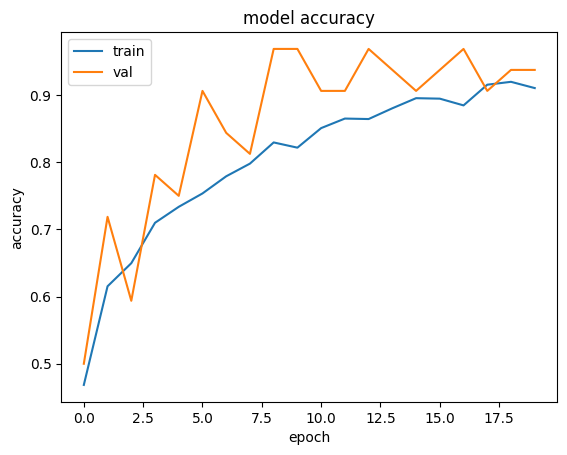

In [11]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model.save('snakespecies.h5')

C:\Users\Ajay\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# train using Xception
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(label)
)